In [92]:
%reload_ext autoreload
%autoreload 2

In [93]:
from teuk import HyperboloidalTeukolskySolver
import collocode
import numpy as np
import qnm

In [94]:
solver = collocode.CollocationODEFixedStepSolver(n=64, chtype=1)
solver_kwargs = {}
hbl_gen = HyperboloidalTeukolskySolver(domains=[[0,1],[1,0]], solver=solver, **solver_kwargs)

In [346]:
sq = -2
lq = 2
mq = 2
aq = 0.9
grav_220 = qnm.modes_cache(s=sq,l=lq,m=mq,n=0)
omega, A, C = grav_220(a=aq)
laq = A + (aq*omega)**2 - 2*mq*aq*omega

In [347]:
grav_2m20 = qnm.modes_cache(s=sq,l=lq,m=-mq,n=0)
omegaM, Am, Cm = grav_2m20(a=aq)
laqM = Am + (aq*omegaM)**2 + 2*mq*aq*omegaM

In [348]:
omega, omegaM

((0.6716142721321631-0.06486923587579635j),
 (0.29724421359059877-0.08828065931500927j))

In [349]:
Psi = hbl_gen(aq, sq, lq, mq, omega, eigenvalue=laq)
PsiMirror = hbl_gen(aq, sq, lq, -mq, -omega.real + 1j*omega.imag, eigenvalue=np.conj(laq))

In [350]:
import matplotlib.pyplot as plt

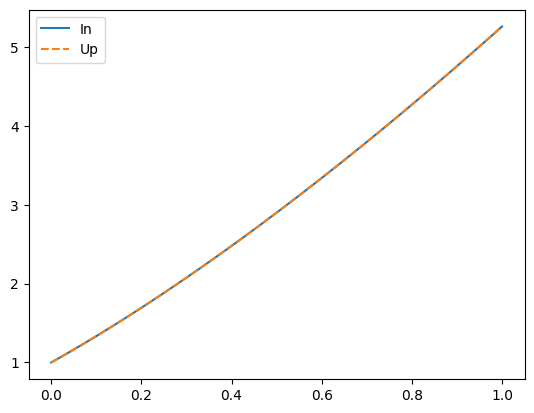

In [351]:
sigmas = np.linspace(0,1, 1000)
PsiInMirrorNorm = PsiMirror('In', sigmas)/PsiMirror('In', 0)
PsiUpMirrorNorm = PsiMirror('Up', sigmas)/PsiMirror('Up', 0)
PsiInNorm = Psi('In', sigmas)/Psi('In', 0)
PsiUpNorm = Psi('Up', sigmas)/Psi('Up', 0)
plt.plot(sigmas, np.abs(PsiInNorm), label='In')
plt.plot(sigmas, np.abs(PsiUpNorm), '--', label='Up')
plt.legend()
plt.show()

In [99]:
from teuk import teuk_sys

P,Q,U = teuk_sys(sigmas, np.sqrt(1-aq**2), sq, la, mq*aq, omega)

/var/folders/1q/xgzwvr552_g723953kd0v0c80000gn/T/ipykernel_79450/2607728946.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(sigmas, np.log10(np.abs(P*Psi('In', sigmas, deriv=2) + Q*Psi('In', sigmas, deriv=1) + U*Psi('In', sigmas, deriv=0))))
/var/folders/1q/xgzwvr552_g723953kd0v0c80000gn/T/ipykernel_79450/2607728946.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(sigmas, np.log10(np.abs(P*Psi('Up', sigmas, deriv=2) + Q*Psi('Up', sigmas, deriv=1) + U*Psi('Up', sigmas, deriv=0))))


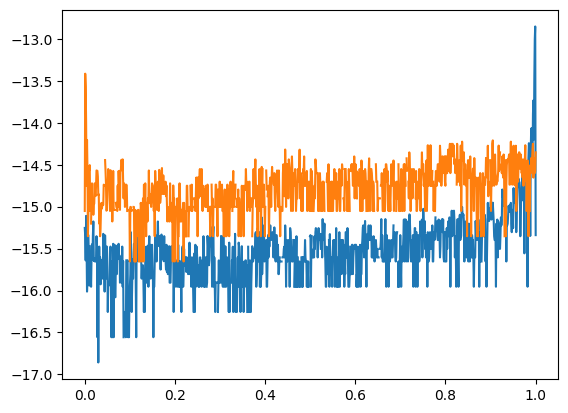

In [100]:
plt.plot(sigmas, np.log10(np.abs(P*Psi('In', sigmas, deriv=2) + Q*Psi('In', sigmas, deriv=1) + U*Psi('In', sigmas, deriv=0))))
plt.plot(sigmas, np.log10(np.abs(P*Psi('Up', sigmas, deriv=2) + Q*Psi('Up', sigmas, deriv=1) + U*Psi('Up', sigmas, deriv=0))))
plt.show()

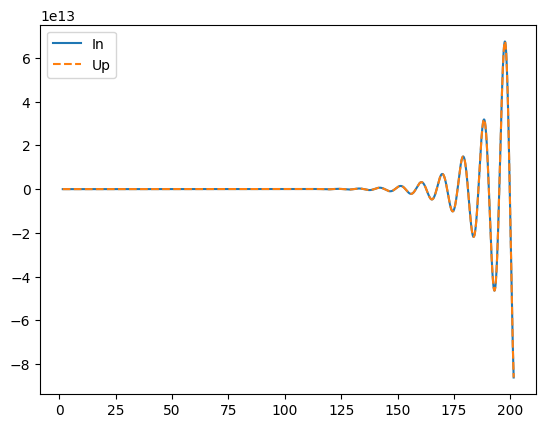

In [105]:
rp = 1 + np.sqrt(1 - aq**2)
rdata = np.linspace(rp + 0.1, rp+200, 2000)
sdata = Psi.sigma_r(rdata)
PsiInNorm = Psi('In', rdata, slicing='t', scaled=False, compactification=False)/Psi('In', rdata[0], slicing='t', scaled=False, compactification=False)
PsiUpNorm = Psi('Up', rdata, slicing='t', scaled=False, compactification=False)/Psi('Up', rdata[0], slicing='t', scaled=False, compactification=False)
plt.plot(rdata, np.real(PsiInNorm), label='In')
plt.plot(rdata, np.real(PsiUpNorm), '--', label='Up')
plt.legend()
plt.show()

In [91]:
# np.savetxt("RinEigenfunction-comparison-data.txt", np.array([PsiInNorm.real, PsiInNorm.imag]).T)

In [111]:
from swsh import sphericalY_expansion

In [117]:
np.sum(C*np.array([sphericalY_expansion(sq, lq + i, mq, 0) for i in range(len(C))]))

(0.11661792779399281+0.00361069213730854j)

In [133]:
Psi["In"].coeffs.shape

(64,)

In [167]:
from teuk import teukolsky_starobinsky_check_minus_2

In [158]:
PsiCheck = teukolsky_starobinsky_check_minus_2(Psi["In"])

In [159]:
PsiCheck(0.5)/Psi["In"](0.5)

(1.243585769663611e+30+1.5589722542798157e+30j)

In [234]:
PsiCheck = teukolsky_starobinsky_check_minus_2(Psi["Up"])

In [235]:
PsiCheck(0.5)/PsiTest["Up"](0.5), PsiCheck(0.4)/PsiTest["Up"](0.4)

((9.89736100007325e+30-2.829531200635031e+30j),
 (7.027294442899138e+30-8.062051815348246e+29j))

In [219]:
from teuk import hbl_teukolsky_starobinsky_system_plus_to_minus_2, hbl_teukolsky_starobinsky_system_minus_to_plus_2

In [229]:
a = 0.9
l = 2
m = 2
kappa = np.sqrt(1-a**2)
freq = 0.4

hbl_new = HyperboloidalTeukolskySolver(domains=[[0, 0.5], [1, 0.5]])

PsiP2 = hbl_new(a, 2, l, m, freq)
PsiM2 = hbl_new(a, -2, l, m, freq)
la = PsiP2.eigenvalue + PsiP2.s*(PsiP2.s+1)

In [230]:
PsiP2["Up"].domain

[0.0, 0.5]

In [232]:
sigma = 0.1
fts, gts = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kappa, la, m*a, freq)
print((fts*PsiP2["Up"](sigma) + gts*PsiP2["Up"](sigma, deriv=1))/PsiM2["Up"](sigma))

sigma = 0.5
fts, gts = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kappa, la, m*a, freq)
print((fts*PsiP2["Up"](sigma) + gts*PsiP2["Up"](sigma, deriv=1))/PsiM2["Up"](sigma))

sigma = 0.5
fts, gts = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kappa, la, m*a, freq)
print((fts*PsiP2["In"](sigma) + gts*PsiP2["In"](sigma, deriv=1))/PsiM2["In"](sigma))

sigma = 0.9
fts, gts = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kappa, la, m*a, freq)
print((fts*PsiP2["In"](sigma) + gts*PsiP2["In"](sigma, deriv=1))/PsiM2["In"](sigma))

(0.40960000000000346+5.240914211797099e-16j)
(0.4095999999978368-2.932629619184873e-13j)
(20.43119426695+27.348116239715246j)
(20.4311948306842+27.348115836309287j)


In [255]:
PsiPS = hbl_gen(aq, sq, lq, mq, omega, eigenvalue=laq)
PsiMS = hbl_gen(aq, -sq, lq, mq, omega, eigenvalue=laq+2.*PsiPS.s)

In [256]:
sigma = 0.5
laqNOS = laq + PsiPS.s*(PsiPS.s+1)
fq, gq = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kq, laqNOS, mq*aq, omega)
print((fq*PsiMS["Up"](sigma) + gq*PsiMS["Up"](sigma, deriv=1))/PsiPS["Up"](sigma))

sigma = 0.
fq, gq = hbl_teukolsky_starobinsky_system_plus_to_minus_2(sigma, kq, laqNOS, mq*aq, omega)
print((fq*PsiMS["Up"](sigma) + gq*PsiMS["Up"](sigma, deriv=1))/PsiPS["Up"](sigma))

(3.073431120560666-1.2459709907070584j)
(3.0734311205611475-1.2459709907077903j)


In [268]:
sigma = 0.5
fq, gq = hbl_teukolsky_starobinsky_system_minus_to_plus_2(sigma, kq, laqNOS, mq*aq, omega)
print((fq*PsiPS["In"](sigma) + gq*PsiPS["In"](sigma, deriv=1))/PsiMS["In"](sigma))

sigma = 1
fq, gq = hbl_teukolsky_starobinsky_system_minus_to_plus_2(sigma, kq, laqNOS, mq*aq, omega)
print((fq*PsiPS["In"](sigma) + gq*PsiPS["In"](sigma, deriv=1))/PsiMS["In"](sigma))

(1.0000000000001066-1.7632152063204798e-13j)
(0.9999999999999883-2.53639377169709e-14j)


In [276]:
hab_gen.PhiRslm

NameError: name 'hab_gen' is not defined

In [301]:
from metric import metric_ORG_ab_modes, metric_IRG_ab_modes
hIRG=metric_IRG_ab_modes(kq, sigma, mq, omega, np.array([[PsiPS["Up"](sigma)], [PsiPS["Up"](sigma, deriv=1)], [PsiPS["Up"](sigma, deriv=2)]]))
# hORG=metric_IRG_ab_modes(kq, sigma, mq, omega, np.array([[PsiPS["Up"](sigma)], [PsiPS["Up"](sigma, deriv=1)], [PsiPS["Up"](sigma, deriv=2)]]))

In [303]:
hIRG

[array([-3.57976021-6.08565197j]),
 array([4.76765517-10.3924294j]),
 array([-4.76765517+10.3924294j]),
 array([-61.79752165+0.98622007j]),
 array([-61.79752165+0.98622007j])]

In [ ]:
Yslm(-2, 2, 2, )